# **Project Name : Black Friday Sales Analysis**

#### **Project Type**: Exploratory Data Analysis  
#### **Contribution**: Individual  
### **Author**: *Vaishnavi Jain*

# **Project Summary** :

* This project analyzes consumer purchase behavior using a Black Friday sale dataset with over 500,000 transactions. It includes customer demographics, product categories, and purchase amounts.

* Goal: To understand key factors influencing customer purchases and uncover actionable insights to support targeted marketing, product strategy, and customer segmentation.

* Key steps:

  1) Cleaned data by handling missing values and removing outliers using the IQR method.

  2) Identified top customers, high- and low-performing products, and most purchased items by age group.

  3) Used visualizations (boxplots, heatmaps) to explore data distribution and feature relationships.

The analysis provides meaningful trends in customer preferences and purchasing patterns, supporting data-driven business decisions.

# **Problem Statement :**

Retail businesses face challenges in understanding customer purchase behavior across diverse demographics and product categories. Given a large dataset containing customer profiles and transaction details, the problem is to analyze and identify key factors influencing purchase decisions, such as age, gender, city, and product preferences. The goal is to extract actionable insights that can help businesses optimize marketing strategies, improve product targeting, and increase overall sales revenue

## <font size="6" color="#FF3206">***Let's Begin !***

# <font size="6">**Step-1 : Import Libraries**

In [ ]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

#configuration libraries
import warnings
warnings.filterwarnings('ignore')


# <font size="6">**Step-2 : Load Dataset**

#### **Upload CSV File to Colab**

In [ ]:
# Upload files from local system
from google.colab import files
uploaded=files.upload()

Saving train.csv to train.csv


#### **Read csv file**

In [ ]:
# Load the dataset into a DataFrame
df=pd.read_csv('train.csv')

In [ ]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


#### **Understand the given variables :**
* User_ID: Unique identifier for each customer.
* Product_ID: Unique identifier for each product.
* Gender: Gender of the customer (e.g., Male, Female).
* Age: Age group of the customer (e.g., 18-25, 26-35, etc.).
* Occupation: Occupation code of the customer (numeric categories).
* City_Category: Category of the city where the customer lives (A, B, C).
* Stay_In_Current_City_Years: Number of years the customer has stayed in the current city.
* Marital_Status: Marital status of the customer (0 = unmarried, 1 = married).
* Product_Category_1: Main category of the product purchased (numeric code).
* Product_Category_2: Secondary product category (some missing values filled).
* Product_Category_3: Tertiary product category (mostly missing, dropped).
*Purchase: Purchase amount (price paid by customer for the product).

#### **Shape inspection:**

In [ ]:
# Print the number of rows and columns in dataset
a = df.shape
print(f'The rows are: {a[0]} and columns are {a[1]}')

The rows are: 550068 and columns are 12


#### **Column Inspection**

In [ ]:
# Display all column names
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [ ]:
#Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


#### **Statistical Summary**

In [ ]:
# Statistical summary of df
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,376430.0,9.842329e+00,5.086590,2.0,5.0,9.0,15.0,18.0
Product_Category_3,166821.0,1.266824e+01,4.125338,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


# <font size="6">**Step-3 : Data Cleaning and Data Exploration**

### **Missing values**

In [ ]:
# Check missing values in each column
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,173638


Product_Category_2 & Product_Category_3 have most null values in dataset

In [ ]:
# Print percentage of missing values in each column
for i in df.columns:
  print(f"column {i}: {np.round(df[i].isnull().sum()*100/len(df),3)}%")

column User_ID: 0.0%
column Product_ID: 0.0%
column Gender: 0.0%
column Age: 0.0%
column Occupation: 0.0%
column City_Category: 0.0%
column Stay_In_Current_City_Years: 0.0%
column Marital_Status: 0.0%
column Product_Category_1: 0.0%
column Product_Category_2: 31.567%
column Product_Category_3: 69.673%
column Purchase: 0.0%


In [ ]:
# Show unique values in Product_Category_2 and Product_Category_3
for i in ['Product_Category_2','Product_Category_3']:
  print(f"{i}: {df[i].unique()}")

Product_Category_2: [nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
Product_Category_3: [nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]


In [ ]:
# Drop the Product_Category_3 column from the DataFrame
df.drop('Product_Category_3',axis=1,inplace=True)

we are dropping "Product_Category_3" column because it have 69.67% of null values which can lead to data loss

In [ ]:
# Fill missing values in Product_Category_2 with the most frequent value (mode)
df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0],inplace=True)

we are filling "Product_Category_2" column with most frequent value in that column

In [ ]:
#after handling null values
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,0


now, there are no null values so we can proceed further

### **Check Duplicates**

In [ ]:
df.duplicated().sum()

np.int64(0)

No duplicates rows

### **Check for unique values in data**

In [ ]:
# Print number of unique values in each column
for i in df.columns:
  print(f"{i}: {len(df[i].unique())}")

User_ID: 5891
Product_ID: 3631
Gender: 2
Age: 7
Occupation: 21
City_Category: 3
Stay_In_Current_City_Years: 5
Marital_Status: 2
Product_Category_1: 20
Product_Category_2: 17
Purchase: 18105


In [ ]:
df['User_ID'].unique()

array([1000001, 1000002, 1000003, ..., 1004113, 1005391, 1001529])

In [ ]:
df['Product_ID'].unique()

array(['P00069042', 'P00248942', 'P00087842', ..., 'P00370293',
       'P00371644', 'P00370853'], dtype=object)

In [ ]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [ ]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [ ]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [ ]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [ ]:
 df['Marital_Status'].unique()

array([0, 1])

In [ ]:
 df['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19])

In [ ]:
 df['Product_Category_2'].unique()

array([ 8.,  6., 14.,  2., 15., 16., 11.,  5.,  3.,  4., 12.,  9., 10.,
       17., 13.,  7., 18.])

### **Top 5 Users by Purchase Count**

In [ ]:
# Find top 5 customers based on number of purchases
df.groupby('User_ID')['Purchase'].count().sort_values(ascending=False).reset_index().head()

,User_ID,Purchase
0,1001680,1026
1,1004277,979
2,1001941,898
3,1001181,862
4,1000889,823


In [ ]:
# Get top 5 customers by purchase count
top_customers = df['User_ID'].value_counts().head(5)
top_customers

,count
User_ID,
1001680,1024
1004277,974
1001941,898
1001181,861
1000889,817


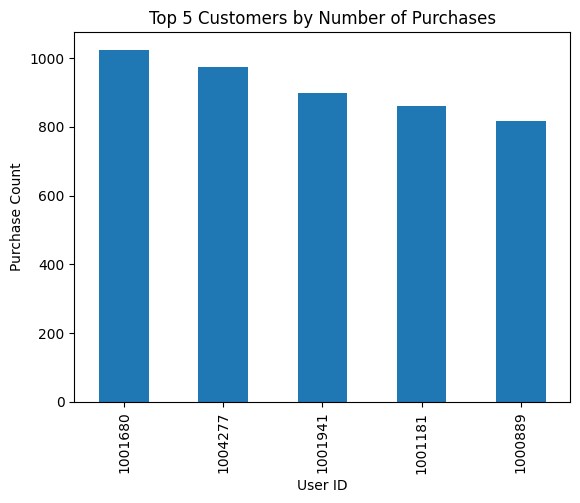

In [ ]:
#bar plot for top 5 customers
top_customers.plot(kind='bar')
plt.title('Top 5 Customers by Number of Purchases')
plt.xlabel('User ID')
plt.ylabel('Purchase Count')
plt.show()

### **Top & Bottom 5 Selling Products by Purchase Count**

In [ ]:
# Get top 5 selling products
top_products = df['Product_ID'].value_counts().head(5)
top_products

,count
Product_ID,
P00265242,1880
P00025442,1615
P00110742,1612
P00112142,1562
P00057642,1470


In [ ]:
# Get bottom 5 selling products
bottom_products = df['Product_ID'].value_counts().tail(5)
bottom_products

,count
Product_ID,
P00185942,1
P00307042,1
P00038842,1
P00329042,1
P00065942,1


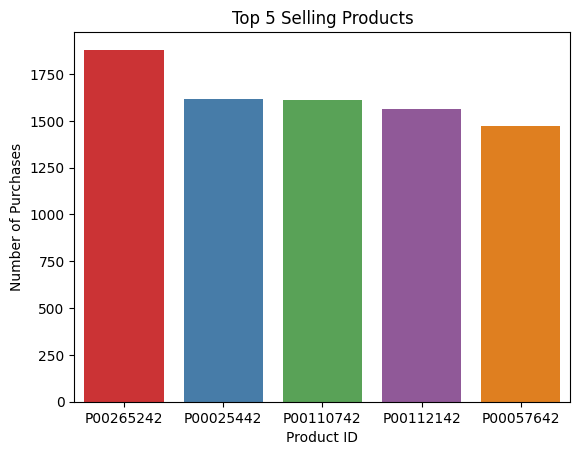

In [ ]:
# Plot top 5 selling products
sns.barplot(x=top_products.index, y=top_products.values, palette='Set1')
plt.title('Top 5 Selling Products')
plt.xlabel('Product ID')
plt.ylabel('Number of Purchases')
plt.show()

### **Most Frequent Product Purchased in Each Age Group**

In [ ]:
# Find the most frequent product in each age group
freq_products = df.groupby(['Age', 'Product_ID']).size().reset_index(name='Count')

# Get the product with max count for each age group
top_products = freq_products.loc[freq_products.groupby('Age')['Count'].idxmax()]

top_products


,Age,Product_ID,Count
1599,0-17,P00255842,65
4607,18-25,P00265242,389
7951,26-35,P00265242,746
9202,36-45,P00025442,356
14452,46-50,P00265242,138
17394,51-55,P00265242,140
20066,55+,P00265242,104


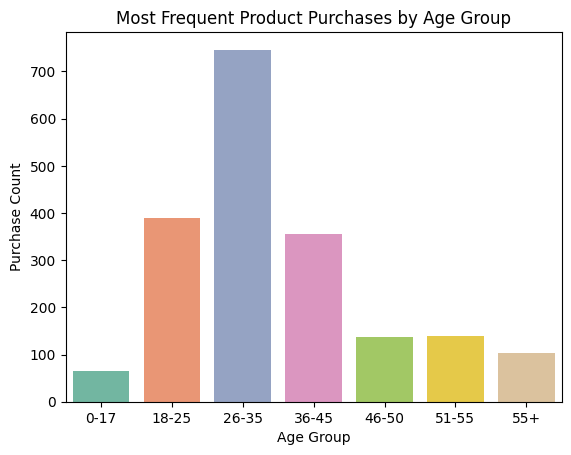

In [ ]:
#Plot barplot for top purchases by age
sns.barplot(x='Age', y='Count', data=top_products, palette='Set2')
plt.xlabel('Age Group')
plt.ylabel('Purchase Count')
plt.title('Most Frequent Product Purchases by Age Group')
plt.show()

Observations:
* 26-35 and 18-25 groups are more active shoppers.
* 36-45 group has specific product needs.
* Younger (0-17) group depends on parents for purchases.
* Older (46+) groups shop less frequently or prefer in-store shopping.

### **Outlier Removal Using IQR Method**

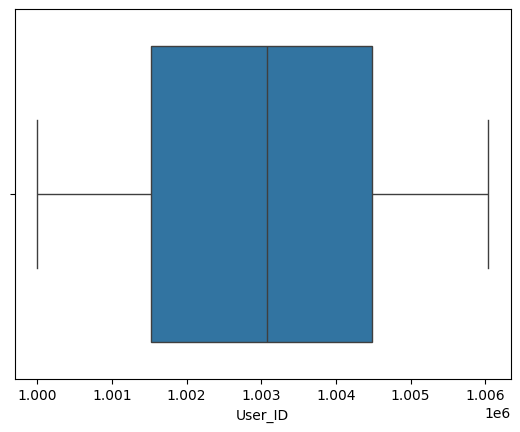

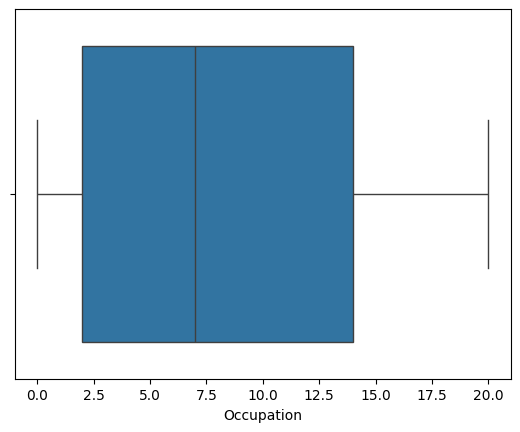

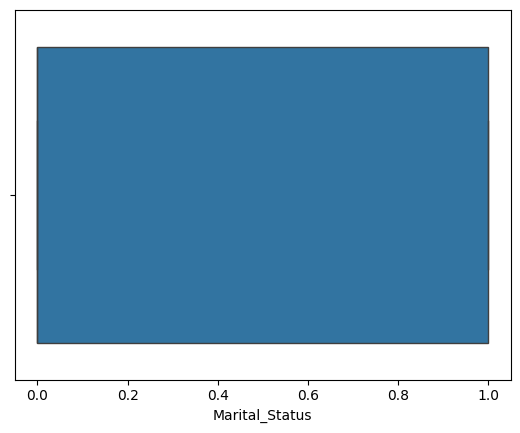

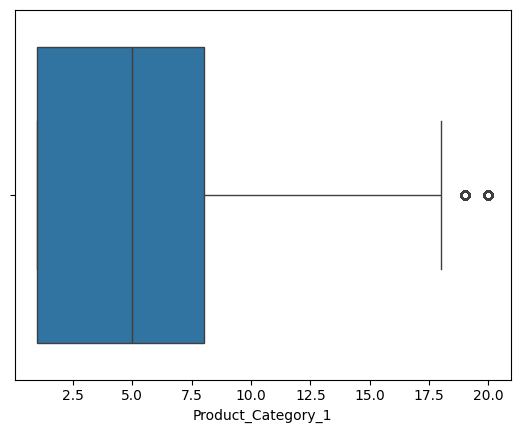

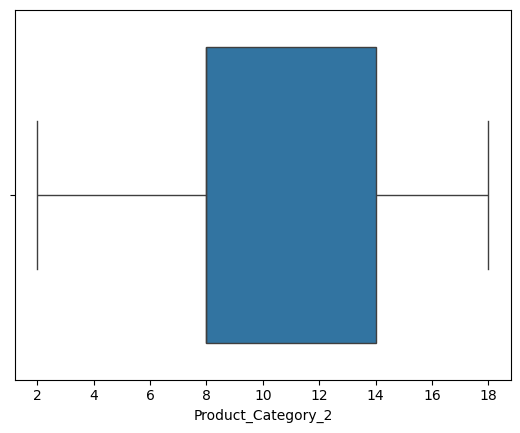

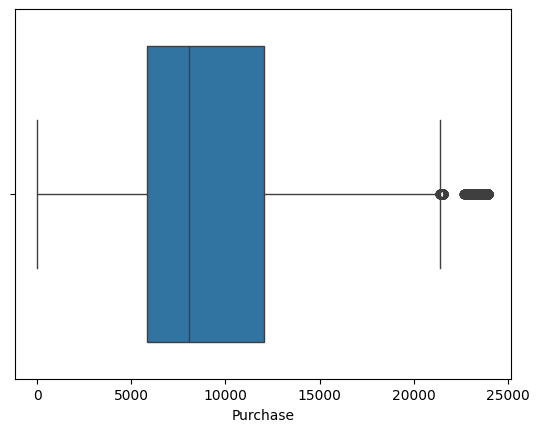

In [ ]:
#Plot boxplot to detect outliers in each column
for col in df.columns:
  if df[col].dtype!='object':
    sns.boxplot(data=df,x=col)
    plt.show()

In [ ]:
# outlier analysis and elimination
Q1=np.percentile(df['Purchase'],25)
Q3=df['Purchase'].quantile(0.75)
IQR=Q3-Q1
UL=Q3+1.5*IQR
LL=Q1-1.5*IQR
df=df[(df['Purchase']<=UL)&(df['Purchase']>=LL)]

In [ ]:
#after removing outlier from df
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,8.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,8.0,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,8.0,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,8.0,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,8.0,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,8.0,365


### **Count of Customers by City Category**

In [ ]:
# Count of customers in each city category
city_counts = df['City_Category'].value_counts()
city_counts

,count
City_Category,
B,230114
C,170241
A,147036


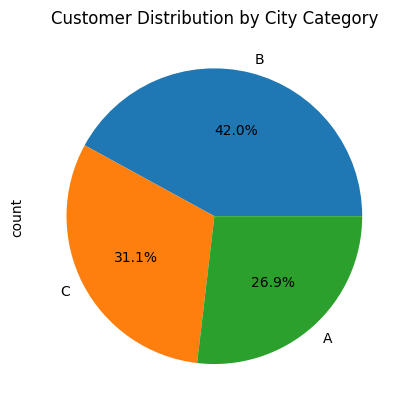

In [ ]:
# Plotting
city_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Customer Distribution by City Category')
plt.show()

Observations:
* City Category ‘B’ has the highest number of customers.
* Categories ‘A’ and ‘C’ have less customers compared to ‘B’.
* This info helps understand where most customers are located.








### **Impact of Gender on Purchase Behavior**

In [ ]:
# Group by Gender and calculate average Purchase
avg_purchase_gender = df.groupby('Gender')['Purchase'].mean().reset_index()
avg_purchase_gender

,Gender,Purchase
0,F,8671.049039
1,M,9367.724355


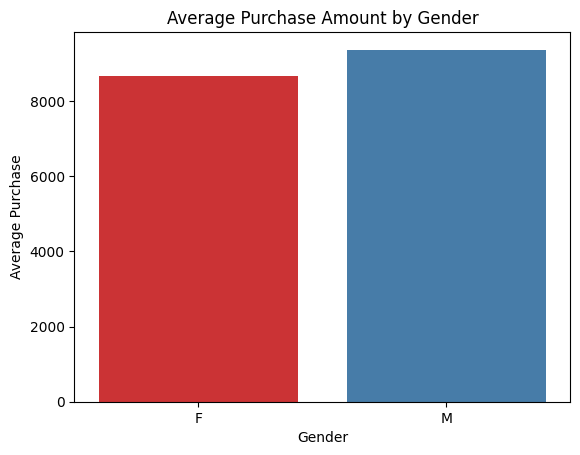

In [ ]:
sns.barplot(x='Gender', y='Purchase', data=avg_purchase_gender, palette='Set1')
plt.title('Average Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Purchase')
plt.show()

Observations:
* Female (F) customers have an average purchase amount of 8671.05.
* Male (M) customers have a higher average purchase amount of 9367.72.
* This suggests that, on average, male customers tend to spend more than female customers during Black Friday sales.

### **Products generates most revenue**

In [ ]:
product_revenue = df.groupby('Product_ID')['Purchase'].sum().reset_index()
product_revenue = product_revenue.sort_values(by='Purchase', ascending=False)
product_revenue.head(5)

,Product_ID,Purchase
249,P00025442,27995166
1016,P00110742,26722309
2443,P00255842,25168963
582,P00059442,24338343
1745,P00184942,24334887


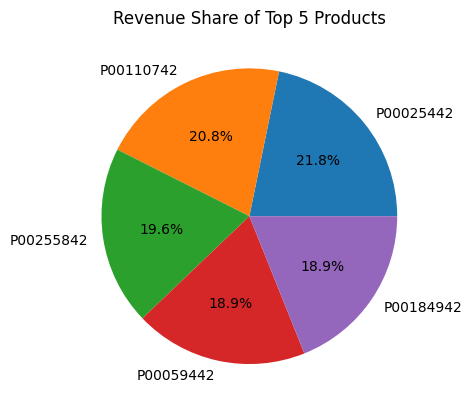

In [ ]:
# select top 5 products
top_products = product_revenue.head(5)

# Plot pie chart
plt.pie(top_products['Purchase'],labels=top_products['Product_ID'],autopct='%1.1f%%')
plt.title('Revenue Share of Top 5 Products')
plt.show()


Observations:
* Product P00025442 earned the highest total revenue, making it the top-selling product in the dataset.
* All top 5 products are likely **Bestsellers**

### **Average Purchase by Age Group and Gender**

In [ ]:
# Group by Age and Gender, then calculate average Purchase
age_gender_avg = df.groupby(['Age', 'Gender'])['Purchase'].mean().reset_index()
age_gender_avg

,Age,Gender,Purchase
0,0-17,F,8276.806993
1,0-17,M,9167.328686
2,18-25,F,8315.265519
3,18-25,M,9389.992388
4,26-35,F,8672.811313
5,26-35,M,9350.069226
6,36-45,F,8888.529553
7,36-45,M,9374.221225
8,46-50,F,8773.000305
9,46-50,M,9273.732681


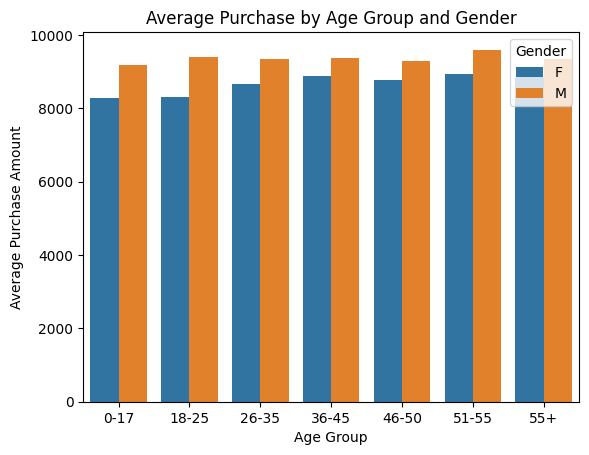

In [ ]:
# Plot barplot
sns.barplot(x='Age', y='Purchase', hue='Gender', data=age_gender_avg)
plt.title('Average Purchase by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Average Purchase Amount')
plt.show()

Observations:
*  Male customers spend more than female customers in every age group.
* Customers in the older age groups (like 51–55 and 55+) also show strong spending, especially among males.
* The lowest spending is seen in the youngest age group (0–17), which makes sense as they may not be primary buyers.



### **Revenue by City Category**

In [92]:
# Total revenue generated by each city category
city_revenue = df.groupby('City_Category')['Purchase'].sum().reset_index()
city_revenue

,City_Category,Purchase
0,A,1300587440
1,B,2090931484
2,C,1642084642


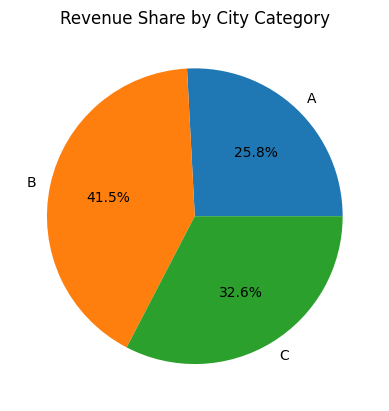

In [97]:
# Pie chart of revenue by city category
plt.pie(city_revenue['Purchase'], labels=city_revenue['City_Category'],autopct='%.1f%%')
plt.title('Revenue Share by City Category')
plt.show()

Onservation:
* City B generated the highest revenue during the Black Friday sale.
* City A generated the lowest revenue, while City C was in between.

### **Average Purchase by City Category with respect to Gender**

In [ ]:
# Group by City_Category and Gender, calculate average Purchase
city_gender_avg = df.groupby(['City_Category', 'Gender'])['Purchase'].mean().reset_index()
city_gender_avg

,City_Category,Gender,Purchase
0,A,F,8516.900287
1,A,M,8950.114824
2,B,F,8483.125703
3,B,M,9287.831201
4,C,F,9058.245415
5,C,M,9838.610504


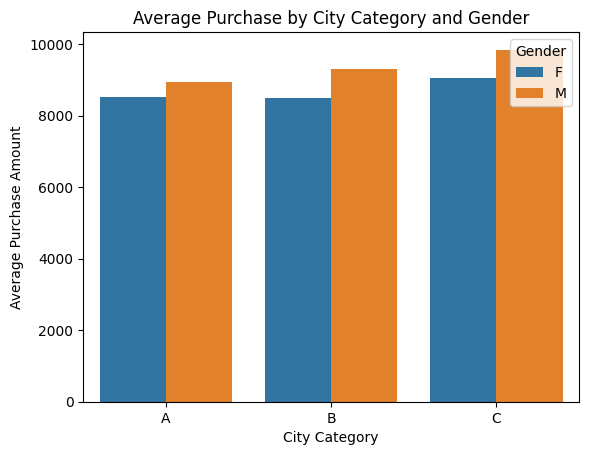

In [ ]:
# Plot chart
sns.barplot(x='City_Category', y='Purchase', hue='Gender', data=city_gender_avg)
plt.title('Average Purchase by City Category and Gender')
plt.xlabel('City Category')
plt.ylabel('Average Purchase Amount')
plt.show()

Observations:
* Customers from City Category C tend to spend more on average than those from categories A and B.
* Across all city categories, male customers spend more than female customers.

### **Correlation Matrix between  numeric columns**

In [ ]:
# Calculate correlation matrix
corr_mat=df.corr(numeric_only=True)
corr_mat

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Purchase
User_ID,1.000000,-0.024127,0.020311,0.003631,0.001713,0.004102
Occupation,-0.024127,1.000000,0.024128,-0.008180,0.001301,0.020428
Marital_Status,0.020311,0.024128,1.000000,0.019591,0.009999,-0.001448
Product_Category_1,0.003631,-0.008180,0.019591,1.000000,0.275362,-0.370128
Product_Category_2,0.001713,0.001301,0.009999,0.275362,1.000000,-0.145441
Purchase,0.004102,0.020428,-0.001448,-0.370128,-0.145441,1.000000


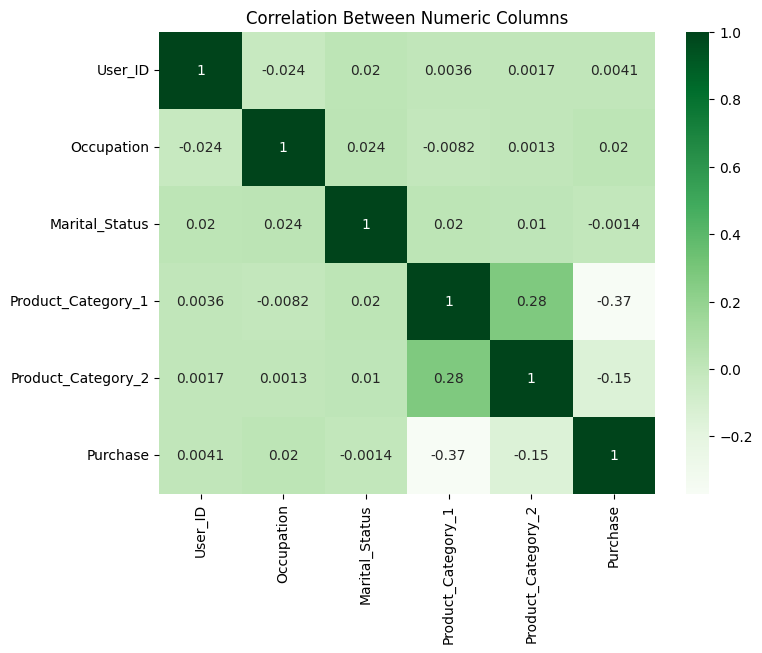

In [ ]:
# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_mat, annot=True, cmap='Greens')
plt.title('Correlation Between Numeric Columns')
plt.show()

Observations:
*  There is a negative correlation between Purchase and Product_Category_1 — this means that as the category number goes up, the purchase amount tends to go down.
* Other columns like Occupation, Marital_Status, and User_ID have very low or almost no correlation with Purchase, suggesting they don’t directly impact Purchase.



# **Business Conclusion:**
* Customers from City Category B bring the most revenue, so businesses should focus marketing efforts there.

* Male customers tend to spend more than female customers across almost all age groups and cities.

* The age groups 18-25 and 26-35 are the most active shoppers and generate higher sales.

* Some products clearly stand out as bestsellers, making them important for inventory and promotion.

* Older customers (above 50) still spend well, so don’t ignore this segment.

* Most customers have stayed in their cities for a few years, showing stable market areas.

* Removing outliers helps focus on typical customer behavior, making the insights more reliable for business decisions.